<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-8/Act3_8_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.7: Regresión No Lineal (Airbnb - Boston)
## Generación del Frame

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar un archivo
from google.colab import files
files.upload()

In [ ]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Crear DataFrame
data = pd.read_csv('boston_listings_clean.csv',encoding='utf-8',index_col=0)
data.shape

(4325, 61)

In [ ]:
#Se corrobora que no haya valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_is_superhost,0
host_verifications,0


# Regresión No Lineal

Para esta actividad, se nos solicita analizar la correlación que existe entre las siguientes variables: host_response_rate (variable objetivo), host_acceptance_rate (variable objetivo), host_total_listings_count (variable objetivo), accommodates (variable objetivo), reviews_per_month (variable objetivo) y price(variable objetivo). Aplicando 2 métodos de Regresión No Lineal, buscando el que coeficiente de correlación resultante sea mayor a la correlación lineal del Mapa de Calor.

## Coeficientes de Correlación Lineales

Utilizando el método de generación del Heat Map, podemos conocer los valores de las correlaciones entre variables de manera lineal.

In [ ]:
#Se crea una copia del frame original
data_cuant = data.copy()

In [ ]:
#Se eliminan columnas innecesarias
data_cuant.drop(['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','bathrooms_text','amenities','has_availability','calendar_last_scraped','first_review','last_review','host_is_superhost','room_type','instant_bookable'],axis=1,inplace=True)
data_cuant.shape

(4325, 39)

In [ ]:
#Verificar que todas las columnas sean cuantitativas
data_cuant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4325 entries, 0 to 4324
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   accommodates                                  4325 non-null   float64
 1   bathrooms                                     4325 non-null   float64
 2   bedrooms                                      4325 non-null   float64
 3   beds                                          4325 non-null   float64
 4   availability_30                               4325 non-null   int64  
 5   number_of_reviews_l30d                        4325 non-null   float64
 6   review_scores_rating                          4325 non-null   float64
 7   review_scores_accuracy                        4325 non-null   float64
 8   review_scores_cleanliness                     4325 non-null   float64
 9   review_scores_checkin                         4325 non-null   float6

In [ ]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_cuant.corr()
corr_factors

,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
accommodates,1.000000,NaN,0.583912,0.478003,-0.015329,0.149403,0.102037,0.085840,0.125246,0.028842,0.065189,0.046559,0.057736,NaN,0.082314,0.009338,0.118409,0.042628,0.042337,-0.071580,-0.097739,-0.207954,-0.075514,-0.025341,-0.013153,-0.015195,0.105864,0.002292,0.205785,-0.250707,-0.134355,0.101173,0.413256,-0.009193,0.094100,-0.014247,0.015058,0.030042,0.026196
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.583912,NaN,1.000000,0.431677,-0.056293,0.030015,0.094429,0.061649,0.065703,0.013875,0.059341,-0.075267,0.097241,NaN,-0.012752,-0.054943,-0.097189,-0.104886,0.008935,-0.019026,-0.034514,0.035773,-0.034822,-0.081540,-0.077853,-0.044183,-0.037447,-0.174647,-0.034399,-0.082348,-0.042192,-0.046036,0.189012,-0.048776,0.018252,-0.034767,-0.006180,-0.012217,-0.011769
beds,0.478003,NaN,0.431677,1.000000,-0.117970,-0.011772,0.035145,0.036622,0.038193,0.015356,0.034400,0.010863,0.041903,NaN,-0.033039,-0.150726,-0.052637,0.027594,-0.013393,0.001195,-0.020349,0.069370,-0.014430,-0.144115,-0.156792,-0.164911,-0.040855,-0.087830,0.035907,-0.119076,-0.071332,0.015358,0.342296,0.084671,0.009079,-0.060952,0.065569,0.098740,0.092578
availability_30,-0.015329,NaN,-0.056293,-0.117970,1.000000,0.046232,-0.082777,-0.086916,-0.051584,-0.083684,-0.079125,-0.040098,-0.067098,NaN,0.038924,0.036706,0.082370,-0.051401,0.031736,-0.179763,-0.175057,-0.105330,-0.188084,0.930538,0.851242,0.390738,0.054245,0.103806,0.005808,0.115009,0.035438,0.071362,-0.031644,-0.111360,0.012433,0.093194,-0.155250,-0.077039,-0.108575
number_of_reviews_l30d,0.149403,NaN,0.030015,-0.011772,0.046232,1.000000,0.088840,0.072959,0.134532,0.066516,0.118705,0.042957,0.033431,NaN,0.473663,0.209661,0.261674,-0.014272,0.060243,-0.470298,-0.492760,-0.421254,-0.465280,0.089218,0.106395,0.008804,0.526084,0.142426,0.086587,-0.056196,-0.034046,0.033105,0.074637,-0.228437,0.313528,0.099966,-0.082803,-0.108527,-0.099323
review_scores_rating,0.102037,NaN,0.094429,0.035145,-0.082777,0.088840,1.000000,0.689788,0.597386,0.552812,0.625580,0.341339,0.683436,NaN,-0.161458,0.018361,-0.001064,-0.088840,-0.055592,-0.029339,-0.048651,-0.087539,-0.048998,-0.091273,-0.090843,-0.108138,0.032271,-0.218612,-0.110879,-0.037490,-0.212301,-0.147523,-0.000402,-0.064516,0.009385,-0.037724,0.021590,-0.008441,0.007351
review_scores_accuracy,0.085840,NaN,0.061649,0.036622,-0.086916,0.072959,0.689788,1.000000,0.565641,0.525471,0.573664,0.313410,0.610870,NaN,-0.156278,0.008179,-0.008927,-0.066620,-0.052729,-0.020103,-0.036254,-0.065974,-0.036148,-0.094911,-0.097915,-0.101901,0.022539,-0.168050,-0.084022,-0.035767,-0.180119,-0.116762,0.017013,-0.031368,0.020741,-0.055493,0.047936,0.011892,0.029287
review_scores_cleanliness,0.125246,NaN,0.065703,0.038193,-0.051584,0.134532,0.597386,0.565641,1.000000,0.459800,0.512790,0.297375,0.523837,NaN,-0.087118,0.056171,0.050003,-0.051506,-0.026196,-0.093292,-0.109592,-0.132374,-0.109224,-0.058429,-0.056480,-0.069876,0.080024,-0.107734,-0.039975,-0.071176,-0.148291,-0.071220,0.085865,-0.060005,0.028543,0.006450,0.009589,-0.014820,-0.004354
review_scores_checkin,0.028842

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)
corr_factors1

,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
accommodates,1.000000,NaN,0.583912,0.478003,0.015329,0.149403,0.102037,0.085840,0.125246,0.028842,0.065189,0.046559,0.057736,NaN,0.082314,0.009338,0.118409,0.042628,0.042337,0.071580,0.097739,0.207954,0.075514,0.025341,0.013153,0.015195,0.105864,0.002292,0.205785,0.250707,0.134355,0.101173,0.413256,0.009193,0.094100,0.014247,0.015058,0.030042,0.026196
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.583912,NaN,1.000000,0.431677,0.056293,0.030015,0.094429,0.061649,0.065703,0.013875,0.059341,0.075267,0.097241,NaN,0.012752,0.054943,0.097189,0.104886,0.008935,0.019026,0.034514,0.035773,0.034822,0.081540,0.077853,0.044183,0.037447,0.174647,0.034399,0.082348,0.042192,0.046036,0.189012,0.048776,0.018252,0.034767,0.006180,0.012217,0.011769
beds,0.478003,NaN,0.431677,1.000000,0.117970,0.011772,0.035145,0.036622,0.038193,0.015356,0.034400,0.010863,0.041903,NaN,0.033039,0.150726,0.052637,0.027594,0.013393,0.001195,0.020349,0.069370,0.014430,0.144115,0.156792,0.164911,0.040855,0.087830,0.035907,0.119076,0.071332,0.015358,0.342296,0.084671,0.009079,0.060952,0.065569,0.098740,0.092578
availability_30,0.015329,NaN,0.056293,0.117970,1.000000,0.046232,0.082777,0.086916,0.051584,0.083684,0.079125,0.040098,0.067098,NaN,0.038924,0.036706,0.082370,0.051401,0.031736,0.179763,0.175057,0.105330,0.188084,0.930538,0.851242,0.390738,0.054245,0.103806,0.005808,0.115009,0.035438,0.071362,0.031644,0.111360,0.012433,0.093194,0.155250,0.077039,0.108575
number_of_reviews_l30d,0.149403,NaN,0.030015,0.011772,0.046232,1.000000,0.088840,0.072959,0.134532,0.066516,0.118705,0.042957,0.033431,NaN,0.473663,0.209661,0.261674,0.014272,0.060243,0.470298,0.492760,0.421254,0.465280,0.089218,0.106395,0.008804,0.526084,0.142426,0.086587,0.056196,0.034046,0.033105,0.074637,0.228437,0.313528,0.099966,0.082803,0.108527,0.099323
review_scores_rating,0.102037,NaN,0.094429,0.035145,0.082777,0.088840,1.000000,0.689788,0.597386,0.552812,0.625580,0.341339,0.683436,NaN,0.161458,0.018361,0.001064,0.088840,0.055592,0.029339,0.048651,0.087539,0.048998,0.091273,0.090843,0.108138,0.032271,0.218612,0.110879,0.037490,0.212301,0.147523,0.000402,0.064516,0.009385,0.037724,0.021590,0.008441,0.007351
review_scores_accuracy,0.085840,NaN,0.061649,0.036622,0.086916,0.072959,0.689788,1.000000,0.565641,0.525471,0.573664,0.313410,0.610870,NaN,0.156278,0.008179,0.008927,0.066620,0.052729,0.020103,0.036254,0.065974,0.036148,0.094911,0.097915,0.101901,0.022539,0.168050,0.084022,0.035767,0.180119,0.116762,0.017013,0.031368,0.020741,0.055493,0.047936,0.011892,0.029287
review_scores_cleanliness,0.125246,NaN,0.065703,0.038193,0.051584,0.134532,0.597386,0.565641,1.000000,0.459800,0.512790,0.297375,0.523837,NaN,0.087118,0.056171,0.050003,0.051506,0.026196,0.093292,0.109592,0.132374,0.109224,0.058429,0.056480,0.069876,0.080024,0.107734,0.039975,0.071176,0.148291,0.071220,0.085865,0.060005,0.028543,0.006450,0.009589,0.014820,0.004354
review_scores_checkin,0.028842,NaN,0.013875,0.015356,0.083684,0.066516,0.552812,0.525471,0.459800,1.000000,0.626446,0.317104,0.520644,NaN,0.216140,0.014319,0.006936,0.09880

<Axes: >

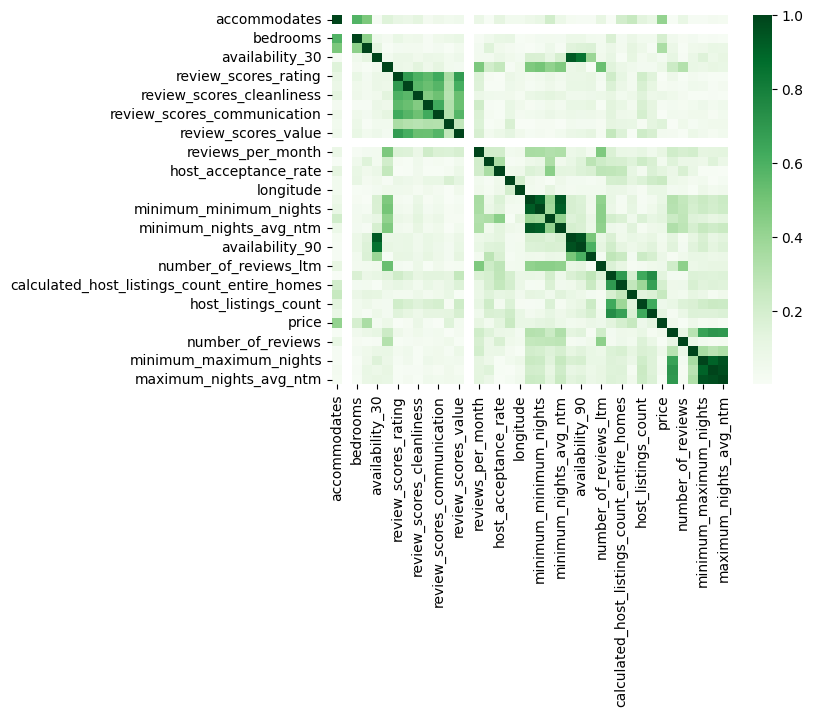

In [ ]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Greens')
Heat_Map

## Gráficas de Variables a Analizar

De las 6 variables objetivo resultara útil para el analisis obtener sus gráficas para poder facilitar la elección del modelo No Lineal a utilizar.

In [ ]:
data_results = data_cuant[['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'reviews_per_month', 'price']]
data_results.head(3)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
0,99.4,96.02,5.0,2.0,0.23,125.0
1,100.0,99.00,14.0,2.0,0.66,139.0
2,100.0,99.00,14.0,4.0,0.71,179.0


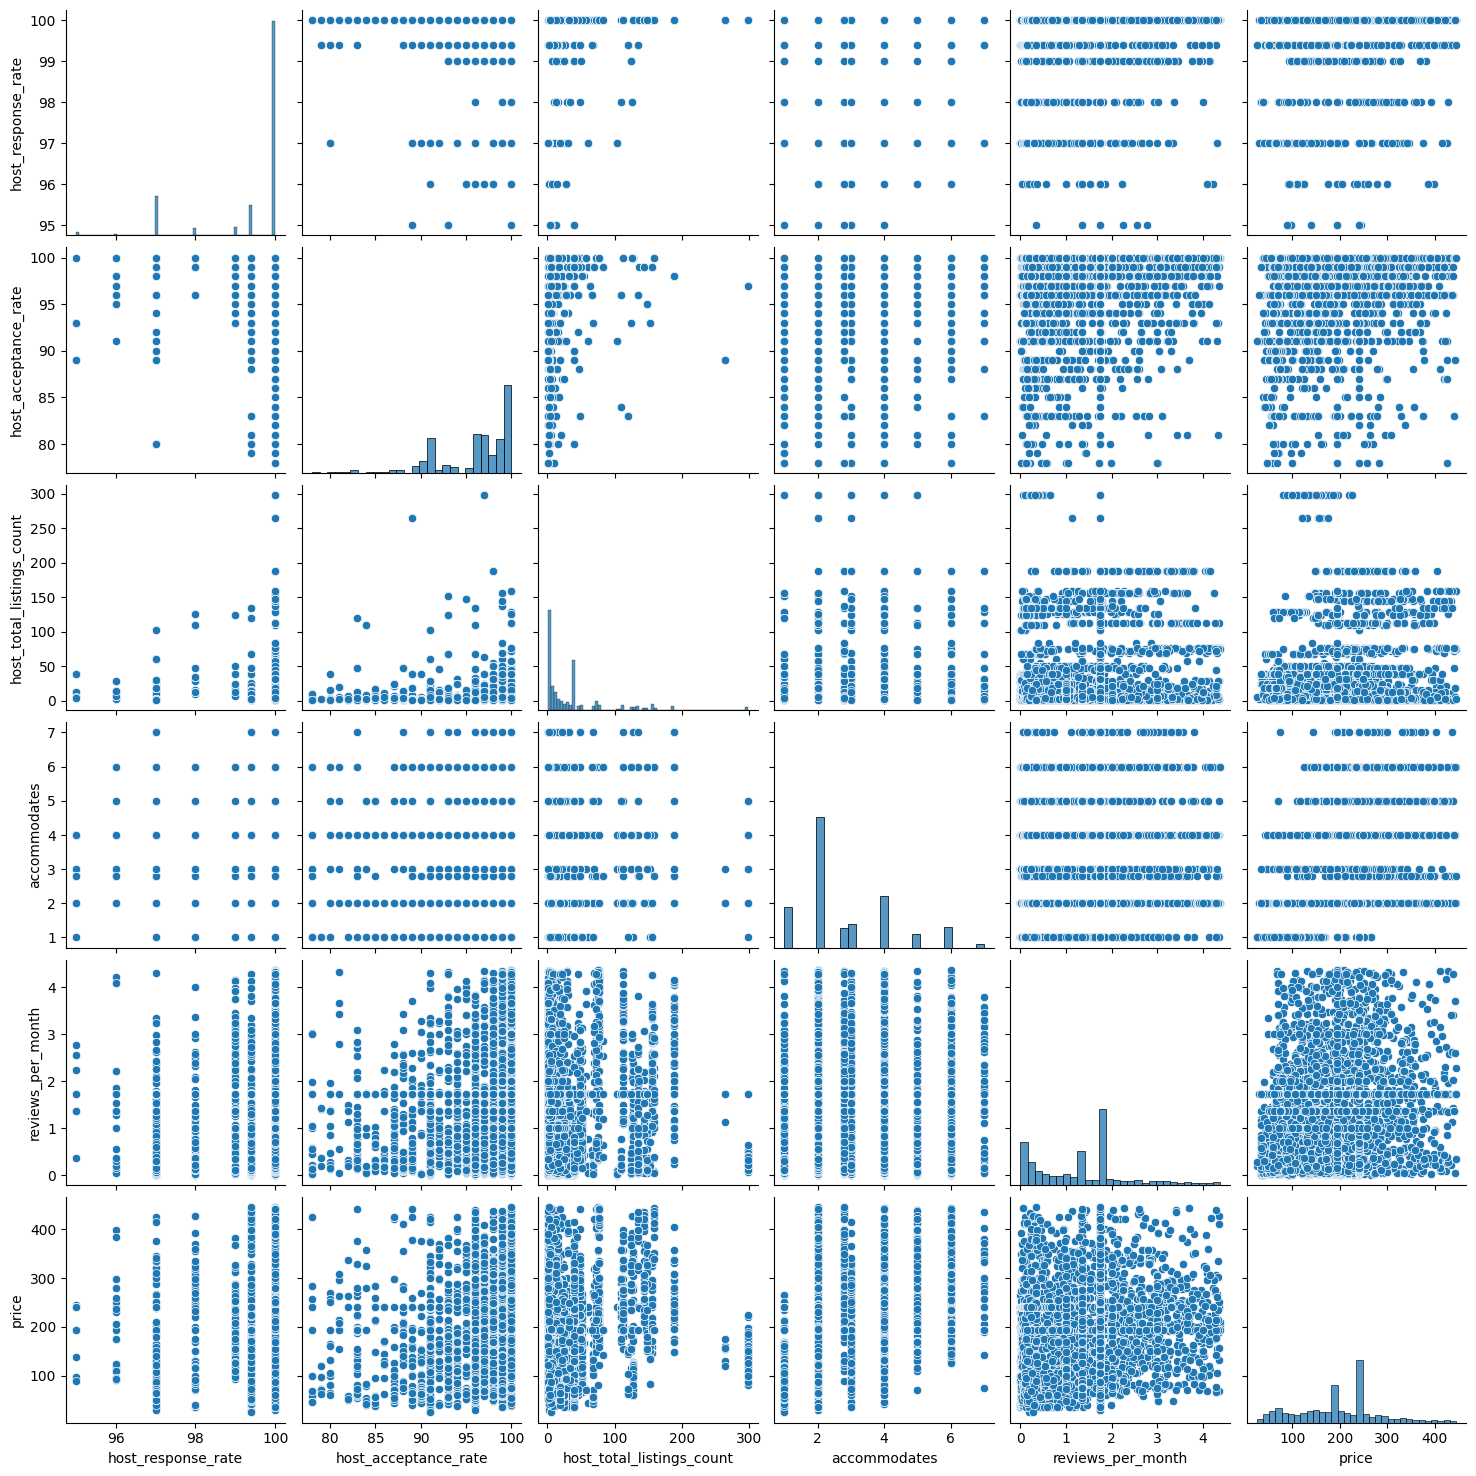

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(data_results)

## Modelación

Utilizando los datos obtenidos anteriormente, creamos los modelos No Lineales pertinentes a cada una de las 6 variables, eleguiendo tanto dos modelos, cómo también las variables independientes que consideremos pertinentes

Los modelos que se pueden utilizar son los siguientes:

        y = ax^2 + bx + c   ("Función cuadrática")

        y = a*exp(-bx) + c   ("Función exponencial")

        y = 1/a*x           ("Función inversa")

        y = a*np.sin(x) + b ("Función senoidal")

        y = a*np.tan(x) + b ("Función tangencial")

        y = a*np.abs(x) + b*x + c (Función Valor absoluto)

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

        y = a*np.log(x) + b  (Función logaritmica)

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

        y = 1/a*x**2  (Función cuadrática inversa)

        y = a/b*x**2 + c*x (Función polinomial inversa)

### Host Response Rate

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_1 = data_cuant[['availability_365']]
y_1 = data_cuant[['host_response_rate']]
# Coeficiente de Correlacion Lineal 0.288016

#### Modelo 1

In [ ]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_1A(x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_1A, covs_1A = curve_fit(func_1A, data_cuant['availability_365'], data_cuant['host_response_rate'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_1A = func_1A(x_1, *parametros_1A)

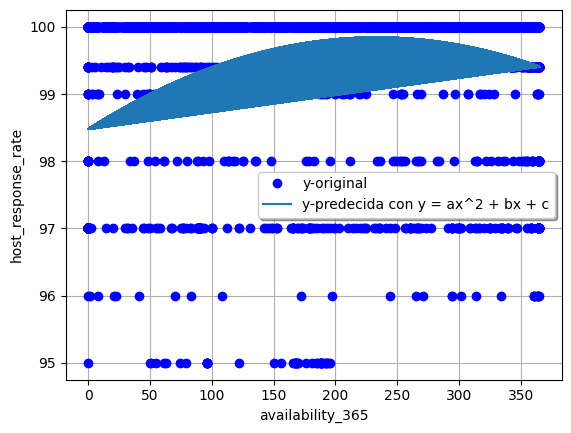

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_1,y_1, 'bo', label='y-original')
plt.plot(x_1,y_pred_1A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('availability_365')
plt.ylabel('host_response_rate')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_1A = r2_score(y_1, y_pred_1A)
r2_modelo_1A

0.152475186943416

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_1A = np.sqrt(abs(r2_modelo_1A))
r_1A

0.39048071263945416

#### Modelo 2

In [ ]:
#Definimos la funcion del modelo
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)
def func_1B(x,a,b,c):
  return a*np.abs(x) + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_1B, covs_1B = curve_fit(func_1B, data_cuant['availability_365'], data_cuant['host_response_rate'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_1B = func_1B(x_1, *parametros_1B)

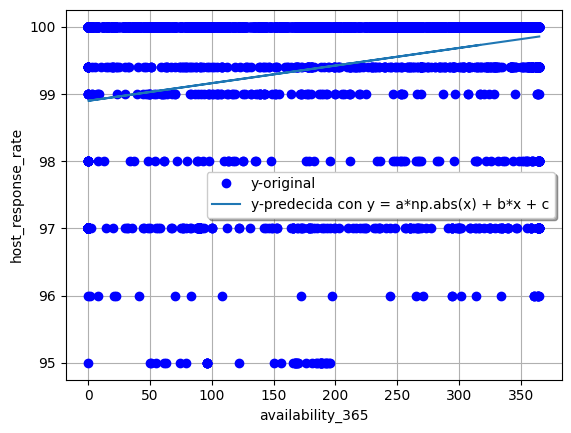

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_1,y_1, 'bo', label='y-original')
plt.plot(x_1,y_pred_1B, label='y-predecida con y = a*np.abs(x) + b*x + c')
plt.xlabel('availability_365')
plt.ylabel('host_response_rate')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_1B = r2_score(y_1, y_pred_1B)
r2_modelo_1B

0.0829533997007128

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_1B = np.sqrt(abs(r2_modelo_1B))
r_1B

0.2880163184625357

### Host Acceptance Rate

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_2 = data_cuant[['maximum_minimum_nights']]
y_2 = data_cuant[['host_acceptance_rate']]
# Coeficiente de Correlacion Lineal 0.436564

#### Modelo 1

In [ ]:
#Definimos la funcion del modelo | cuadratica, exponencial
#y = ax^2 + bx + c   ("Función cuadrática")
def func_2A(x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_2A, covs_2A = curve_fit(func_2A, data_cuant['maximum_minimum_nights'], data_cuant['host_acceptance_rate'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_2A = func_2A(x_2, *parametros_2A)

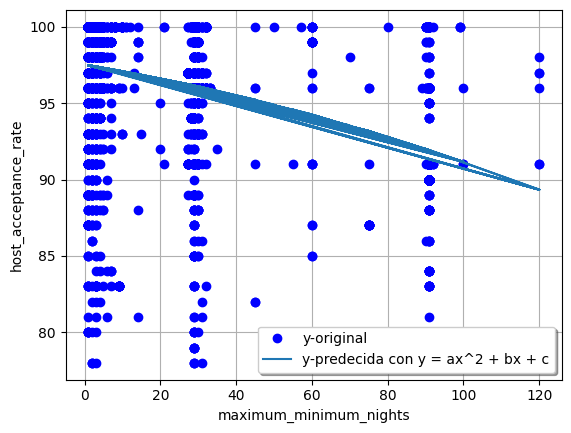

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_2,y_2, 'bo', label='y-original')
plt.plot(x_2,y_pred_2A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('maximum_minimum_nights')
plt.ylabel('host_acceptance_rate')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_2A = r2_score(y_2, y_pred_2A)
r2_modelo_2A

0.19231727169278579

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_2A = np.sqrt(abs(r2_modelo_2A))
r_2A

0.43853993169697303

#### Modelo 2

In [ ]:
#Definimos la funcion del modelo
#y = a*exp(-bx) + c   ("Función exponencial")
def func_2B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_2B, covs_2B = curve_fit(func_2B, data_cuant['maximum_minimum_nights'], data_cuant['host_acceptance_rate'], maxfev=5000)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#Predicciones
y_pred_2B = func_2B(x_2, *parametros_2B)

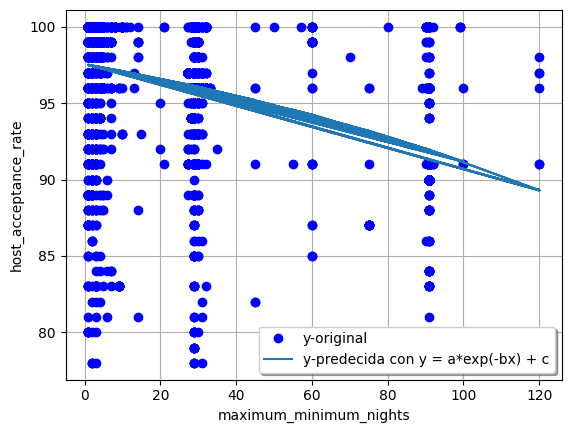

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_2,y_2, 'bo', label='y-original')
plt.plot(x_2,y_pred_2B, label='y-predecida con y = a*exp(-bx) + c')
plt.xlabel('maximum_minimum_nights')
plt.ylabel('host_acceptance_rate')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_2B = r2_score(y_2, y_pred_2B)
r2_modelo_2B

0.1921204057978555

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_2B = np.sqrt(abs(r2_modelo_2B))
r_2B

0.4383154181612318

### Host Total Listings Count

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_3 = data_cuant[['calculated_host_listings_count']]
y_3 = data_cuant[['host_total_listings_count']]
# Coeficiente de Correlacion Lineal 0.745230

#### Modelo 1

In [ ]:
#Definimos la funcion del modelo | cuadratica, abs?,
#y = ax^2 + bx + c   ("Función cuadrática")
def func_3A(x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_3A, covs_3A = curve_fit(func_3A, data_cuant['calculated_host_listings_count'], data_cuant['host_total_listings_count'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_3A = func_3A(x_3, *parametros_3A)

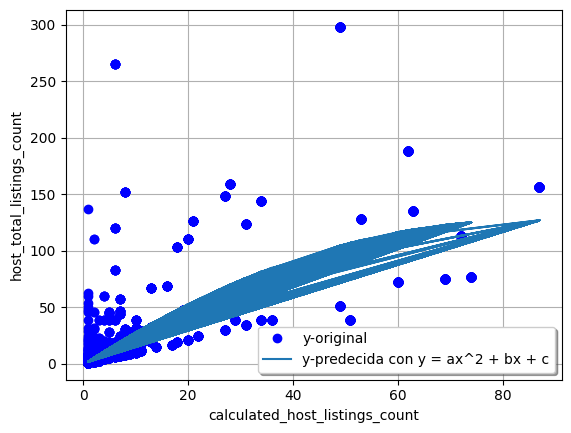

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_3,y_3, 'bo', label='y-original')
plt.plot(x_3,y_pred_3A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('host_total_listings_count')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_3A = r2_score(y_3, y_pred_3A)
r2_modelo_3A

0.5828602681063396

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_3A = np.sqrt(abs(r2_modelo_3A))
r_3A

0.7634528591251326

#### Modelo 2

In [ ]:
#Definimos la funcion del modelo
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)
def func_3B(x,a,b,c):
  return a*np.abs(x) + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_3B, covs_3B = curve_fit(func_3B, data_cuant['calculated_host_listings_count'], data_cuant['host_total_listings_count'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_3B = func_3B(x_3, *parametros_3B)

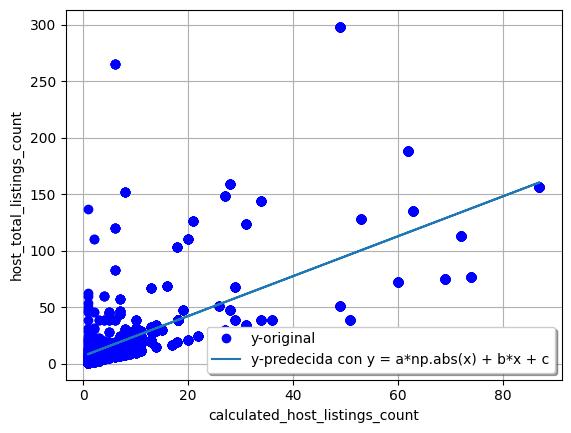

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_3,y_3, 'bo', label='y-original')
plt.plot(x_3,y_pred_3B, label='y-predecida con y = a*np.abs(x) + b*x + c')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('host_total_listings_count')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_3B = r2_score(y_3, y_pred_3B)
r2_modelo_3B

0.5553676370490181

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_3B = np.sqrt(abs(r2_modelo_3B))
r_3B

0.7452299222716559

### Accommodates

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_4 = data_cuant[['bedrooms']]
y_4 = data_cuant[['accommodates']]
# Coeficiente de Correlacion Lineal 0.583912

#### Modelo 1

In [ ]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_4A(x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_4A, covs_4A = curve_fit(func_4A, data_cuant['bedrooms'], data_cuant['accommodates'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_4A = func_4A(x_4, *parametros_4A)

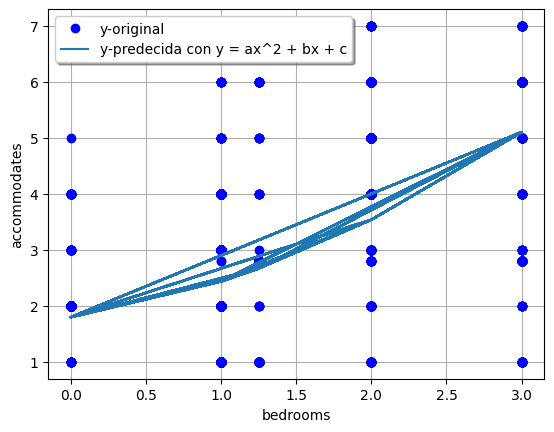

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_4,y_4, 'bo', label='y-original')
plt.plot(x_4,y_pred_4A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_4A = r2_score(y_4, y_pred_4A)
r2_modelo_4A

0.3580787868139248

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_4A = np.sqrt(abs(r2_modelo_4A))
r_4A

0.598396847262688

#### Modelo 2

In [ ]:
#Definimos la funcion del modelo
#y = a*exp(-bx) + c   ("Función exponencial")
def func_4B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_4B, covs_4B = curve_fit(func_4B, data_cuant['bedrooms'], data_cuant['accommodates'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_4B = func_4B(x_4, *parametros_4B)

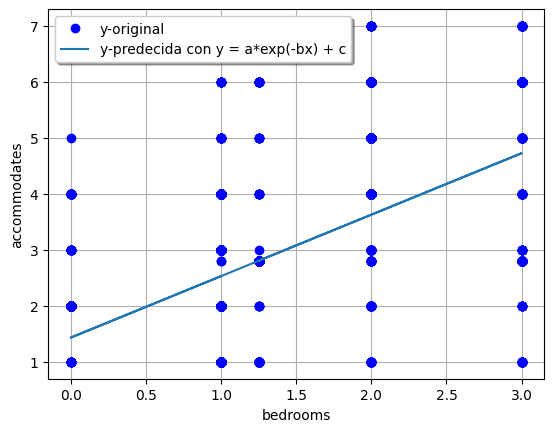

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_4,y_4, 'bo', label='y-original')
plt.plot(x_4,y_pred_4B, label='y-predecida con y = a*exp(-bx) + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_4B = r2_score(y_4, y_pred_4B)
r2_modelo_4B

0.34094253218250825

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_4B = np.sqrt(abs(r2_modelo_4B))
r_4B

0.5839028448145361

### Reviews Per Month

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_5 = data_cuant[['number_of_reviews_l30d']]
y_5 = data_cuant[['reviews_per_month']]
# Coeficiente de Correlacion Lineal 0.473663

#### Modelo 1

In [ ]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_5A(x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_5A, covs_5A = curve_fit(func_5A, data_cuant['number_of_reviews_l30d'], data_cuant['reviews_per_month'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_5A = func_5A(x_5, *parametros_5A)

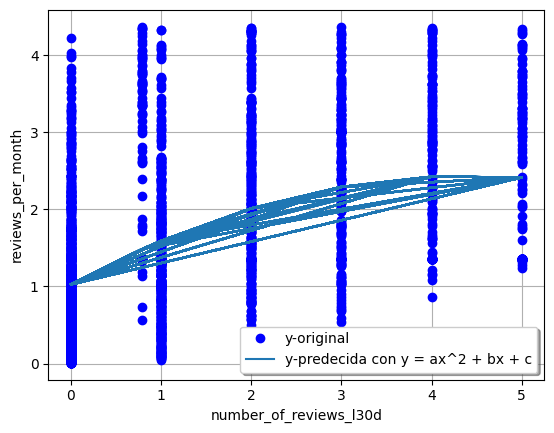

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_5,y_5, 'bo', label='y-original')
plt.plot(x_5,y_pred_5A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('number_of_reviews_l30d')
plt.ylabel('reviews_per_month')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_5A = r2_score(y_5, y_pred_5A)
r2_modelo_5A

0.2409633115414186

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_5A = np.sqrt(abs(r2_modelo_5A))
r_5A

0.49088013968933253

#### Modelo 2

In [ ]:
#Definimos la funcion del modelo
#y = a*exp(-bx) + c   ("Función exponencial")
def func_5B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_5B, covs_5B = curve_fit(func_5B, data_cuant['number_of_reviews_l30d'], data_cuant['reviews_per_month'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_5B = func_5B(x_5, *parametros_5B)

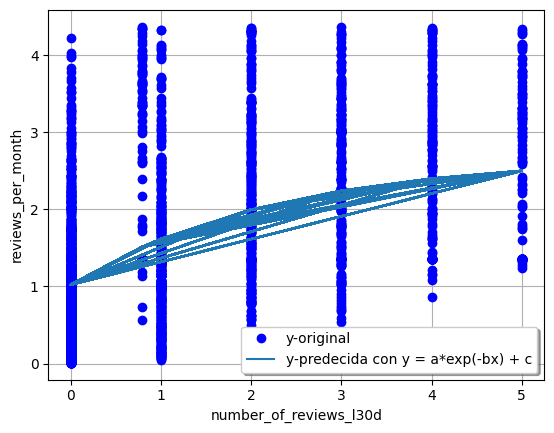

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_5,y_5, 'bo', label='y-original')
plt.plot(x_5,y_pred_5B, label='y-predecida con y = a*exp(-bx) + c')
plt.xlabel('number_of_reviews_l30d')
plt.ylabel('reviews_per_month')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_5B = r2_score(y_5, y_pred_5B)
r2_modelo_5B

0.24031199684560112

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_5B = np.sqrt(abs(r2_modelo_5B))
r_5B

0.490216275582116

### Price

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_6 = data_cuant[['accommodates']]
y_6 = data_cuant[['price']]
# Coeficiente de Correlacion Lineal 0.413256

#### Modelo 1

In [ ]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_6A(x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_6A, covs_6A = curve_fit(func_6A, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)

In [ ]:
#Predicciones
y_pred_6A = func_6A(x_6, *parametros_6A)

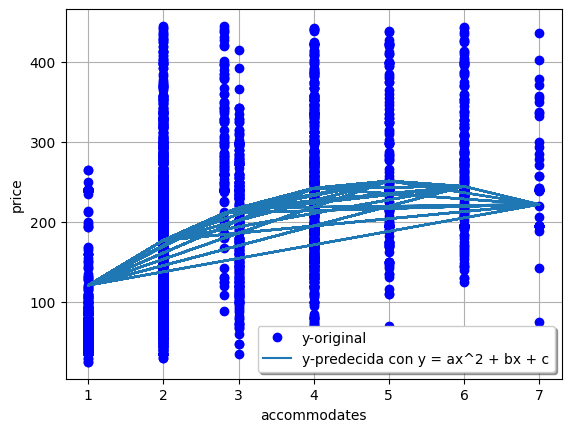

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_6,y_6, 'bo', label='y-original')
plt.plot(x_6,y_pred_6A, label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_6A = r2_score(y_6, y_pred_6A)
r2_modelo_6A

0.2159075033223833

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_6A = np.sqrt(abs(r2_modelo_6A))
r_6A

0.4646584803082618

#### Modelo 2

In [ ]:
#Definimos la funcion del modelo
#y = a*np.log(x) + b  (Función logaritmica)
def func_6B(x,a,b,c):
  return a*np.log(x) + b

In [ ]:
#Ajustamos los parametros de la funcion curve_fit
parametros_6B, covs_6B = curve_fit(func_6B, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)

<ipython-input-87-d20a2ace611c>:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros_6B, covs_6B = curve_fit(func_6B, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)


In [ ]:
#Predicciones
y_pred_6B = func_6B(x_6, *parametros_6B)

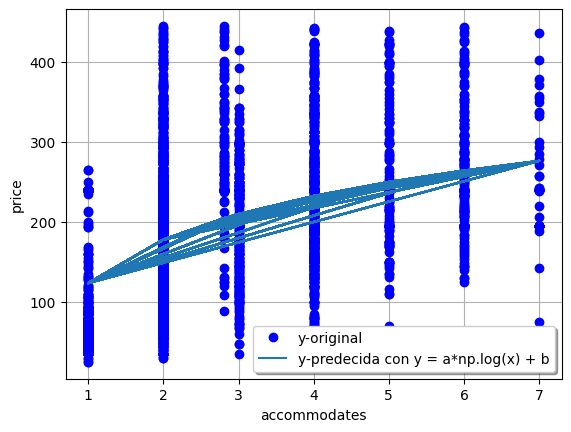

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_6,y_6, 'bo', label='y-original')
plt.plot(x_6,y_pred_6B, label='y-predecida con y = a*np.log(x) + b')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_6B = r2_score(y_6, y_pred_6B)
r2_modelo_6B

0.21388750496778053

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
r_6B = np.sqrt(abs(r2_modelo_6B))
r_6B

0.4624797346563204

### Tabla de Coeficientes de Determinación y Correlación

In [ ]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[r2_modelo_1A,r2_modelo_1B,r2_modelo_2A,r2_modelo_2B,r2_modelo_3A,r2_modelo_3B,r2_modelo_4A,r2_modelo_4B,r2_modelo_5A,r2_modelo_5B,r2_modelo_6A,r2_modelo_6B],
             'Coef_Correl':[r_1A,r_1B,r_2A,r_2B,r_3A,r_3B,r_4A,r_4B,r_5A,r_5B,r_6A,r_6B]}

#Generar con llaves
df_coef_result = pd.DataFrame(coef_data,index=['Host_Response_Rate_M1','Host_Response_Rate_M2','Host_Acceptance_Rate_M1','Host_Acceptance_Rate_M2','Host_Total_Listings_Count_M1','Host_Total_Listings_Count_M2','Accommodates_M1','Accommodates_M2','Reviews_Per_Month_M1','Reviews_Per_Month_M2','Price_M1','Price_M2'])
df_coef_result

,Coef_Deter,Coef_Correl
Host_Response_Rate_M1,0.152475,0.390481
Host_Response_Rate_M2,0.082953,0.288016
Host_Acceptance_Rate_M1,0.192317,0.438540
Host_Acceptance_Rate_M2,0.192120,0.438315
Host_Total_Listings_Count_M1,0.582860,0.763453
Host_Total_Listings_Count_M2,0.555368,0.745230
Accommodates_M1,0.358079,0.598397
Accommodates_M2,0.340943,0.583903
Reviews_Per_Month_M1,0.240963,0.490880
Reviews_Per_Month_M2,0.240312,0.490216
